In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
from pathlib import Path
DATA = Path('data/qol')
!ls {DATA}

sentinel  sentinel.csv


In [3]:
data = pd.read_csv(DATA/'sentinel.csv')

In [4]:
pd.options.display.max_columns = 100

In [5]:
data.head()

,cluster,state,region,source,uor,lat,lng,wealth,num_rooms,num_mosquito_nets,water_src,water_treatment,toilet_type,floor,wall,roof,cooking_fuel,electricity,radio,television,refrigirator,bicycle,car_truck,telephone,mobile,agriculture_land,livestock,bank_account,net_used,education,Aridity_2015,Drought_Episodes,Enhanced_Vegetation_Index_2015,Irrigation,Wet_Days_2015,BUILT_Population_2014,Global_Human_Footprint,Nightlights_Composite,UN_Population_Density_2015,drought,pop_density,livestock_bin,agriculture_land_bin
0,310502,Tamil Nadu,Thiruvallur,GPS,R,13.320202,80.010414,c:middle,2,0,public tap/standpipe,no,no facility/bush/field,cement,cement blocks,rcc/rbc/cement/concrete,"lpg, natural gas",1.000000,0.045455,0.863636,0.318182,0.500000,0.000000,0.0,0.909091,0.363636,0.272727,0.954545,0.000000,secondary,15.174576,5.0,2807.666667,37.346310,6.005833,0.012774,32.888889,0.828298,462.148768,mid,avg,low,mid
1,310190,Tamil Nadu,Thiruvallur,GPS,R,13.118380,79.803917,c:middle,1,0,piped to yard/plot,no,no facility/bush/field,cement,cement/concrete,rcc/rbc/cement/concrete,biogas,1.000000,0.000000,1.000000,0.363636,0.772727,0.045455,0.0,1.000000,0.363636,0.363636,1.000000,0.000000,secondary,16.771959,5.0,2951.750000,26.850726,5.442500,0.020493,39.093333,0.670533,645.543333,mid,high,mid,mid
2,310070,Tamil Nadu,Thiruvallur,GPS,R,13.147002,79.804755,c:middle,2,0,public tap/standpipe,yes,no facility/bush/field,cement,cement/concrete,rcc/rbc/cement/concrete,"lpg, natural gas",0.909091,0.000000,0.909091,0.227273,0.727273,0.000000,0.0,0.863636,0.454545,0.727273,0.954545,0.000000,secondary,16.771959,5.0,2897.000000,24.897802,5.442500,0.020496,37.667546,0.604633,640.212813,mid,high,high,mid
3,310716,Tamil Nadu,Thiruvallur,GPS,R,13.263585,80.188453,c:middle,1,0,public tap/standpipe,no,flush to septic tank,cement,cement/concrete,rcc/rbc/cement/concrete,"lpg, natural gas",1.000000,0.136364,0.954545,0.454545,0.590909,0.000000,0.0,0.909091,0.045455,0.500000,0.954545,0.000000,secondary,15.174576,10.0,2774.583333,46.309860,6.005833,0.052614,48.724138,2.940362,873.909888,high,high,mid,low
4,310592,Tamil Nadu,Thiruvallur,GPS,R,13.261215,80.222348,c:middle,2,0,piped into dwelling,no,no facility/bush/field,cement,cement blocks,asbestos sheets,"lpg, natural gas",1.000000,0.136364,1.000000,0.500000,0.681818,0.000000,0.0,1.000000,0.045455,0.681818,0.863636,0.045455,secondary,15.174576,10.0,2767.545455,34.305649,6.005833,0.081102,56.188830,4.134337,973.932858,high,high,mid,low


In [6]:
rural = data[data.uor == 'R']
urban = data[data.uor == 'U']

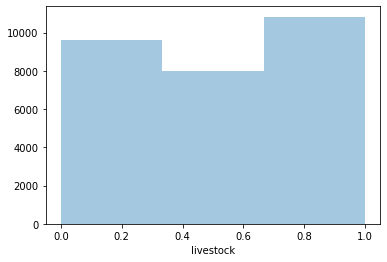

In [7]:
sns.distplot(data.livestock, bins=3, kde=False)

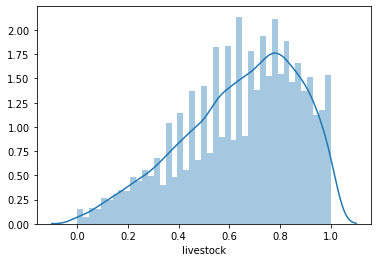

In [8]:
sns.distplot(rural.livestock)

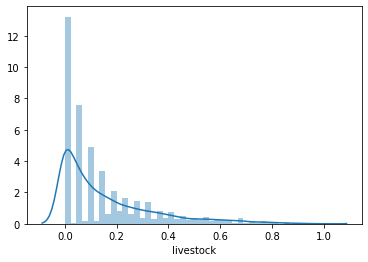

In [9]:
sns.distplot(urban.livestock)

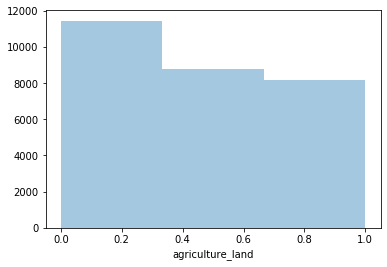

In [10]:
sns.distplot(data.agriculture_land, bins=3, kde=False)

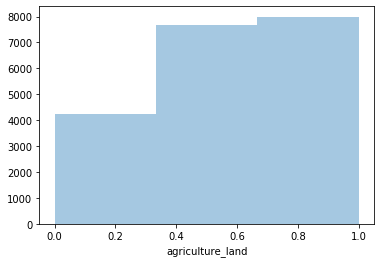

In [11]:
sns.distplot(rural.agriculture_land, bins=3, kde=False)

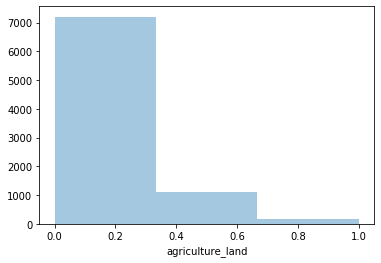

In [12]:
sns.distplot(urban.agriculture_land, bins=3, kde=False)

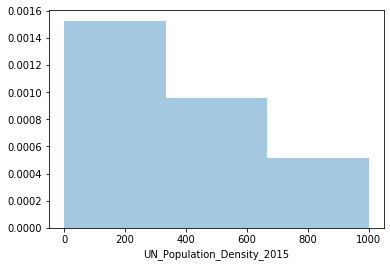

In [13]:
sns.distplot(rural[(~rural.UN_Population_Density_2015.isnull()) & (rural.UN_Population_Density_2015 < 1000)]['UN_Population_Density_2015'], bins=3, kde=False, norm_hist=True)

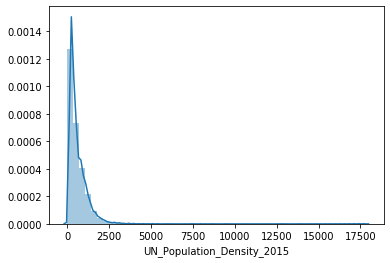

In [14]:
sns.distplot(rural[~rural.UN_Population_Density_2015.isnull()]['UN_Population_Density_2015'])

In [15]:
data.UN_Population_Density_2015.describe()

count    28379.000000
mean      1235.160778
std       3664.506995
min          0.000000
25%        237.763595
50%        471.316053
75%        954.589507
max      63807.058333
Name: UN_Population_Density_2015, dtype: float64

(array([2371., 1609.,    0., 2265., 4064.,  224., 9447., 3320., 1808.,
        3271.]),
 array([ 1. ,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1, 10. ]),
 <a list of 10 Patch objects>)

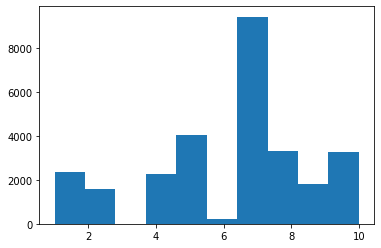

In [16]:
plt.hist(data.Drought_Episodes)

### Fill NA with mean of the column

In [17]:
data['UN_Population_Density_2015'].fillna((data['UN_Population_Density_2015'].mean()), inplace=True)
data['Drought_Episodes'].fillna(data['Drought_Episodes'].mean(), inplace=True)

In [18]:
data['drought'] = pd.cut(data.Drought_Episodes, bins=[0,3,6,10], labels=['low', 'mid', 'high'], include_lowest=True)

In [19]:
data['drought'].value_counts()

high    18070
mid      6329
low      3980
Name: drought, dtype: int64

In [20]:
data['pop_density'] = pd.cut(data.UN_Population_Density_2015, bins=[0, 50, 200, 600, 1000, 100000], labels=['v.low', 'low', 'avg', 'high', 'v.high'], include_lowest=True)

In [21]:
data['livestock_bin'] = pd.cut(data.livestock, bins=[0,0.3,0.7,1.0], labels=['low', 'mid', 'high'], include_lowest=True)

In [22]:
data['agriculture_land_bin'] = pd.cut(data.agriculture_land, bins=[0,0.3,0.7,1.0], labels=['low', 'mid', 'high'], include_lowest=True)

In [23]:
data.head(20)

,cluster,state,region,source,uor,lat,lng,wealth,num_rooms,num_mosquito_nets,water_src,water_treatment,toilet_type,floor,wall,roof,cooking_fuel,electricity,radio,television,refrigirator,bicycle,car_truck,telephone,mobile,agriculture_land,livestock,bank_account,net_used,education,Aridity_2015,Drought_Episodes,Enhanced_Vegetation_Index_2015,Irrigation,Wet_Days_2015,BUILT_Population_2014,Global_Human_Footprint,Nightlights_Composite,UN_Population_Density_2015,drought,pop_density,livestock_bin,agriculture_land_bin
0,310502,Tamil Nadu,Thiruvallur,GPS,R,13.320202,80.010414,c:middle,2,0,public tap/standpipe,no,no facility/bush/field,cement,cement blocks,rcc/rbc/cement/concrete,"lpg, natural gas",1.000000,0.045455,0.863636,0.318182,0.500000,0.000000,0.000000,0.909091,0.363636,0.272727,0.954545,0.000000,secondary,15.174576,5.0,2807.666667,37.346310,6.005833,0.012774,32.888889,0.828298,462.148768,mid,avg,low,mid
1,310190,Tamil Nadu,Thiruvallur,GPS,R,13.118380,79.803917,c:middle,1,0,piped to yard/plot,no,no facility/bush/field,cement,cement/concrete,rcc/rbc/cement/concrete,biogas,1.000000,0.000000,1.000000,0.363636,0.772727,0.045455,0.000000,1.000000,0.363636,0.363636,1.000000,0.000000,secondary,16.771959,5.0,2951.750000,26.850726,5.442500,0.020493,39.093333,0.670533,645.543333,mid,high,mid,mid
2,310070,Tamil Nadu,Thiruvallur,GPS,R,13.147002,79.804755,c:middle,2,0,public tap/standpipe,yes,no facility/bush/field,cement,cement/concrete,rcc/rbc/cement/concrete,"lpg, natural gas",0.909091,0.000000,0.909091,0.227273,0.727273,0.000000,0.000000,0.863636,0.454545,0.727273,0.954545,0.000000,secondary,16.771959,5.0,2897.000000,24.897802,5.442500,0.020496,37.667546,0.604633,640.212813,mid,high,high,mid
3,310716,Tamil Nadu,Thiruvallur,GPS,R,13.263585,80.188453,c:middle,1,0,public tap/standpipe,no,flush to septic tank,cement,cement/concrete,rcc/rbc/cement/concrete,"lpg, natural gas",1.000000,0.136364,0.954545,0.454545,0.590909,0.000000,0.000000,0.909091,0.045455,0.500000,0.954545,0.000000,secondary,15.174576,10.0,2774.583333,46.309860,6.005833,0.052614,48.724138,2.940362,873.909888,high,high,mid,low
4,310592,Tamil Nadu,Thiruvallur,GPS,R,13.261215,80.222348,c:middle,2,0,piped into dwelling,no,no facility/bush/field,cement,cement blocks,asbestos sheets,"lpg, natural gas",1.000000,0.136364,1.000000,0.500000,0.681818,0.000000,0.000000,1.000000,0.045455,0.681818,0.863636,0.045455,secondary,15.174576,10.0,2767.545455,34.305649,6.005833,0.081102,56.188830,4.134337,973.932858,high,high,mid,low
5,310068,Tamil Nadu,Thiruvallur,GPS,R,13.216290,79.987377,b:poorer,1,0,public tap/standpipe,no,no facility/bush/field,mud/clay/earth,burnt bricks,rcc/rbc/cement/concrete,wood,0.954545,0.045455,0.909091,0.181818,0.318182,0.090909,0.045455,0.863636,0.272727,0.636364,0.681818,0.000000,secondary,16.771959,5.0,2934.636364,29.681717,5.442500,0.008289,36.857520,0.930685,807.616260,mid,high,mid,low
6,310829,Tamil Nadu,Thiruvallur,GPS,R,13.169783,79.549283,c:middle,2,0,public tap/standpipe,yes,no facility/bush/field,cement,cement/concrete,rcc/rbc/cement/concrete,"lpg, natural gas",1.000000,0.000000,0.818182,0.181818,0.500000,0.000000,0.000000,0.954545,0.090909,0.409091,1.000000,0.090909,secondary,16.771959,5.0,3151.416667,14.456605,5.442500,0.009506,39.605263,0.755626,564.345021,mid,avg,mid,low
7,310815,Tamil Nadu,Thiruvallur,GPS,R,13.332639,80.213072,d:richer,2,0,public tap/standpipe,no,flush to septic tank,cement,cement/concrete,rcc/rbc/cement/concrete,"lpg, natural gas",1.000000,0.181818,1.000000,0.772727,0.772727,0.000000,0.045455,1.000000,0.363636,0.318182,1.000000,0.000000,secondary,15.174576,10.0,2757.900000,49.203267,6.005833,0.028341,44.037433,1.627909,635.071542,high,high,mid,mid
8,311094,Tamil Nadu,Thiruvallur,GPS,R,13.443895,79.978049,c:middle,1,0,public tap/standpipe,no,flush to septic tank,cement,cement/concrete,rcc/rbc/cement/concrete,"lpg, natural gas",1.000000,0.050000,0.900000,0.400000,0.500000,0.000000,0.000000,0.850000,0.000000,0.100000,0.900000,0.150000,secon

In [24]:
data.to_csv(DATA/'sentinel.csv', index=False)

In [25]:
!ls {DATA}

sentinel  sentinel.csv
